# Aula 4 - Teorema Central do Limite

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Teorema Central do Limite

Pq o nome? https://mathoverflow.net/questions/44132/what-are-central-limit-theorems-and-why-are-they-called-so

___
___
___

In [1]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

____
____
____

## 1) Teorema Central do Limite (TCL ou TLC)

Esse é um dos teoremas mais poderosos e fundamentais da estatística, porque ele é usado **como base para muitos outros resultados**. 

A ideia é que muitos dos resultados de inferência estatística são válidos assumindo como hipótese que os dados sob análise (**mais precisamente, os estimadores pontuais**) seguem uma distribuição normal. 

No entanto, há muitos casos de interesse em que a **distribuição populacional não é normal** -- e, na verdade, não temos como saber com segurança qual é a distribuição populacional, dado que temos apenas acesso às amostras!

Assim, a priori, muitos dos resultados e métodos da inferência estatística seriam invalidados, dado que não podemos assegurar qual é a distribuição populacional dos dados que estamos analisando.

E é neste contexto que o TCL mostra seu poder e importância, pois ele mostra que **estimadores pontuais de parâmetros populacionais serão normalmente distribuídos, INDEPENDENTE DA DISTRIBUIÇÃO POPULACIONAL!**

Vamos enunciá-lo, e depois veremos alguns exemplos:

> Seja uma **amostra aleatória** ($x_1, x_2, \cdots, x_n$) de uma variável aleatória $X$ com **qualquer distribuição**, média $\mu$ e desvio padrão $\sigma$. Para $n$ suficientemente grande ($n>30$), a **distribuição das médias amostrais**, $\overline{X}$, se **aproxima de uma distribuição normal** com média $\mu_{\overline{x}} = \mu$ e erro padrão $SE_{\overline{X}} = \frac{\sigma}{\sqrt{n}}$. Isto é, $$\overline{X} \sim N \left(\mu, \frac{\sigma}{\sqrt{n}} \right)$$
OBS.: quando estamos falando do **estimador amostral do desvio padrão**, costumamos usar o termo **erro padrão** (standard error), denotado $SE$.

Existe também uma versão do TCL para a **a distribuição de porporções amostrais**:

> Seja uma **amostra aleatória** ($x_1, x_2, \cdots, x_n$) de uma variável aleatória $X$ com **qualquer distribuição**, que tem como parâmetro populacional a proporção $p$. Se $np \geq 10$ e $n(1-p) \geq 10$, a **distribuição das proporções amostrais**, $\hat{p}$, se **aproxima de uma distribuição normal** com média $\mu_{\hat{p}} = p$ e erro padrão $SE_{\hat{p}} = \sqrt{\frac{p(1-p)}{n}}$. Isto é, $$\hat{p} \sim N \left(p, \sqrt{\frac{p(1-p)}{n}} \right)$$
OBS.: como $p$ em geral é desconhecida, a condição de aplicação pode ser avaliada com: $n\hat{p} \geq 10$ e $n(1-\hat{p}) \geq 10$. 

O que o TCL para as médias diz, essencialmente, é:

> A distribuição de **médias das amostras** tiradas de **qualquer distribuição populacional** será **aproximadamente normal**, contanto que fizermos uma quantidade razoável de amostras com tamanho amostral $n>30$.

E, para as proporções:

> A distribuição de **proporções das amostras** tiradas de **qualquer distribuição populacional** será **aproximadamente normal**, contanto que fizermos uma quantidade razoável de amostras com tamanho amostral tal que $np \geq 10$ e $n(1-p) \geq 10$.

E isso é um resultado fantástico, pois nos permite a construção de uma **distribuição normal**, para a qual vale uma série de resultados e teoremas, a partir de **qualquer distribuição populacional**!

Vamos ver alguns exemplos:

____

__População: Distribuição Uniforme__

A **função densidade de probabilidade** da [distribuição uniforme](https://en.wikipedia.org/wiki/Continuous_uniform_distribution) é dada por:

$$f(x) = \left\{\begin{matrix}
\frac{1}{b-a} \ ,  & a \leq x \leq b\\ 
0 \ , & x\leq a \ \text{ou} \  x \geq b
\end{matrix}\right.$$

Com:

$$ \mu = \frac{1}{2}(a + b) $$

$$ \sigma = \frac{1}{\sqrt{12}}(b-a) $$

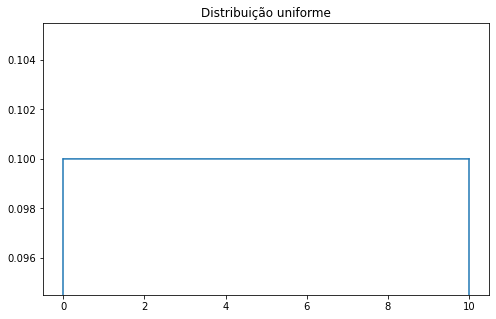

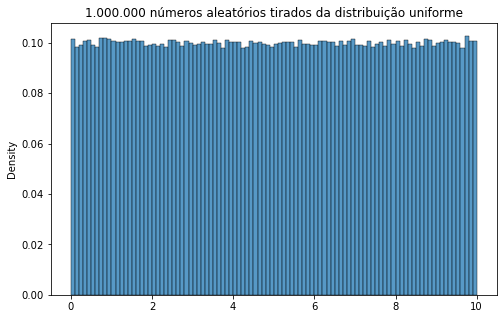


###############################################################

Média da distribuição populacional: 5.0
Desvio padrão da distribuição populacional: 2.886751345948129


In [2]:
plt.figure(figsize=(8, 5))
plt.title("Distribuição uniforme")

# x de 0 a 10
x = np.linspace(0, 10, 10000)

# y = f(x)
a = 0
b = 10
y = np.ones(10000)/(b-a)

plt.plot(x, y)
plt.axvline(x=0, ymax=0.5)
plt.axvline(x=10, ymax=0.5)

plt.show()

###############################################################

plt.figure(figsize=(8, 5))
plt.title("1.000.000 números aleatórios tirados da distribuição uniforme")

amostra=np.random.random(1000000)*10
sns.histplot(x=amostra, stat="density")

plt.show()

###############################################################

print("\n###############################################################\n")

print("Média da distribuição populacional:", 0.5*(a+b))
print("Desvio padrão da distribuição populacional:", (1/np.sqrt(12))*(b-a))

In [104]:
# tirando "num" amostras aleatórias de n=30 unidades

# configuração da amostragem
num=100
n=30

# lista de médias amostrais
medias_amostrais = []

for i in range(num):
   
    # amostra aleatória
    amst = np.random.random(n)*10 
    
    # media da amostra
    media_amostral = amst.mean()
    
    # apenda à lista
    medias_amostrais.append(media_amostral)
    

    print("Amostra número", i+1)
    print(amst)
    print("\nMédia da amostra:", media_amostral)

    print("\n########################################################## \n")

print("\n_____________________________________________________________________ \n")
print("\nDistribuição de médias amostrais:\n")
print(medias_amostrais)

Amostra número 1
[5.8511212  1.06546685 1.09043469 8.98836855 1.96205248 2.64218583
 4.80296651 3.16865009 7.52043542 6.99979645 7.5044433  7.7166487
 5.86006397 0.01173394 8.99149887 7.93948121 8.04287293 6.57755853
 1.60979098 4.22363124 1.42812633 2.04839737 5.37049513 2.5646347
 2.66494565 1.56806452 9.20756758 1.38421187 1.80499241 2.52682464]

Média da amostra: 4.437915397953467

########################################################## 

Amostra número 2
[3.77177059 7.76957613 7.12489524 6.33864222 6.95797084 9.61777331
 0.57429692 5.39227214 6.24112494 9.53263441 2.72254884 3.44507077
 6.31704295 4.51695541 9.29109197 3.98428888 4.61841674 7.36592005
 2.14332221 1.52783754 1.10950306 5.01685278 3.77003648 7.69734956
 0.07095137 4.62326308 6.88090554 9.79837035 1.37116286 7.84924187]

Média da amostra: 5.248036301221964

########################################################## 

Amostra número 3
[4.61084542 6.8185052  7.69847359 7.54469628 9.22648292 4.83740539
 6.41947873 8.

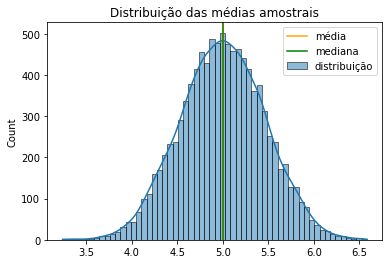


###############################################################

Média da distribuição de médias amostrais: 4.996974662901567 	 mediana: 4.9981670352007095
Erro padrão da distribuição de médias amostrais: 0.4629782310135305
SE*sqrt(n): 2.9281314341567253

###############################################################

Média da distribuição populacional: 5.0
Desvio padrão da distribuição populacional: 2.886751345948129

###############################################################

Erro na estimativa da média: 0.0030253370984327788


In [3]:
#_________________________________________________________
# amostragem

num=10000
n=40
medias_amostrais = np.array([(np.random.random(n)*10).mean() for _ in range(num)])

# medidas da distribuição amostral
media = medias_amostrais.mean()
std = medias_amostrais.std()
mediana = np.median(medias_amostrais)

#_________________________________________________________
# plot

plt.title("Distribuição das médias amostrais")

# distribuição
sns.histplot(medias_amostrais, kde=True, label="distribuição")

# reta da média
plt.axvline(media, label="média", color="orange")
# reta da mediana
plt.axvline(mediana, label="mediana", color="green")

plt.legend()
plt.show()

#_________________________________________________________
# infos

print("\n###############################################################\n")

print("Média da distribuição de médias amostrais:", media, "\t mediana:", mediana)
print("Erro padrão da distribuição de médias amostrais:", std)
print("SE*sqrt(n):", std*np.sqrt(n))

print("\n###############################################################\n")

print("Média da distribuição populacional:", 0.5*(a+b))
print("Desvio padrão da distribuição populacional:", (1/np.sqrt(12))*(b-a))

print("\n###############################################################\n")

print("Erro na estimativa da média:", abs(media - 0.5*(a+b)))

____

__População: Distribuição Gamma__

A **função densidade de probabilidade** da [distribuição gamma](https://en.wikipedia.org/wiki/Gamma_distribution) é dada por:

$$ f(x) = \frac{\beta^\alpha x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)} $$

Com:

$$ \mu = \frac{\alpha}{\beta} $$

$$ \sigma = \frac{\sqrt{\alpha}}{\beta} $$

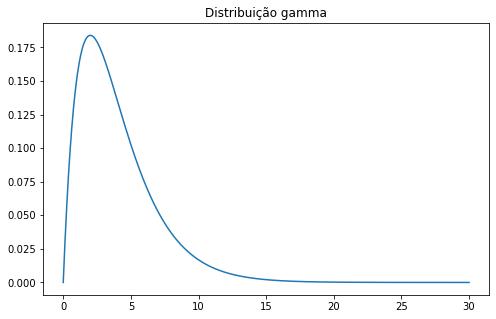

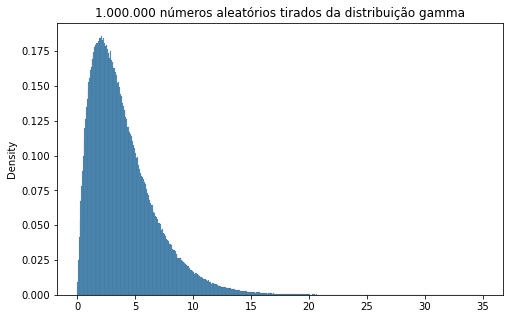


###############################################################

Média da distribuição populacional: 4.0
Desvio padrão da distribuição populacional: 2.8284271247461903


In [108]:
import scipy

plt.figure(figsize=(8, 5))
plt.title("Distribuição gamma")

# x de 0 a 10
x = np.linspace(0, 30, 10000)

# y = f(x)
alpha = 2
beta = 1/2
y = (beta**alpha)*(x**(alpha-1))*(np.exp(-beta*x))/scipy.special.gamma(alpha)

plt.plot(x, y)

plt.show()

###############################################################

plt.figure(figsize=(8, 5))
plt.title("1.000.000 números aleatórios tirados da distribuição gamma")

amostra=np.random.gamma(shape=alpha, scale=1/beta, size=1000000)

sns.histplot(x=amostra, stat="density")

plt.show()

###############################################################

print("\n###############################################################\n")

print("Média da distribuição populacional:", alpha/beta)
print("Desvio padrão da distribuição populacional:", np.sqrt(alpha)/beta)

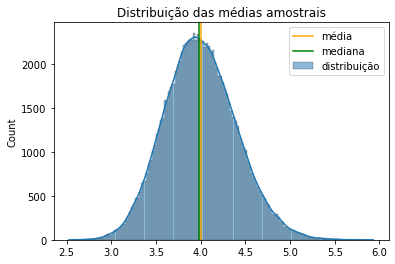


###############################################################

Média da distribuição de médias amostrais: 3.9987020691591275 	 mediana: 3.983807566275166
Erro padrão da distribuição de médias amostrais: 0.4001673201334093
SE*sqrt(n): 2.8296102567558177

###############################################################

Média da distribuição populacional: 4.0
Desvio padrão da distribuição populacional: 2.8284271247461903

###############################################################

Erro na estimativa da média: 0.0012979308408724854


In [110]:
#_________________________________________________________
# amostragem

num=100000
n=50
medias_amostrais = [(np.random.gamma(shape=alpha, scale=1/beta, size=n)).mean() for i in range(num)]

# medidas da distribuição amostral
media = np.array(medias_amostrais).mean()
std = np.array(medias_amostrais).std()
mediana = np.median(np.array(medias_amostrais))

#_________________________________________________________
# plot

plt.title("Distribuição das médias amostrais")

# distribuição
sns.histplot(medias_amostrais, kde=True, label="distribuição")

# reta da média
plt.axvline(media, label="média", color="orange")
# reta da mediana
plt.axvline(mediana, label="mediana", color="green")

plt.legend()
plt.show()

#_________________________________________________________
# infos

print("\n###############################################################\n")

print("Média da distribuição de médias amostrais:", media, "\t mediana:", mediana)
print("Erro padrão da distribuição de médias amostrais:", std)
print("SE*sqrt(n):", std*np.sqrt(n))

print("\n###############################################################\n")

print("Média da distribuição populacional:", alpha/beta)
print("Desvio padrão da distribuição populacional:", np.sqrt(alpha)/beta)

print("\n###############################################################\n")

print("Erro na estimativa da média:", abs(media - alpha/beta))

____

__População: Distribuição exponencial__

A **função densidade de probabilidade** da [distribuição exponencial](https://en.wikipedia.org/wiki/Exponential_distribution) é dada por:

$$f(x) = \left\{\begin{matrix}
\lambda e^{-\lambda x} \ ,  & x \geq 0\\ 
0 \ , & x <0
\end{matrix}\right.$$

Com:

$$ \mu = \frac{1}{\lambda} $$

$$ \sigma = \frac{1}{\lambda} $$

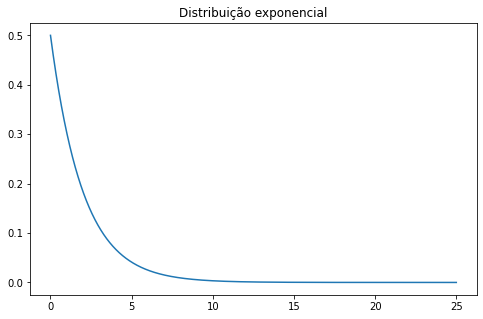

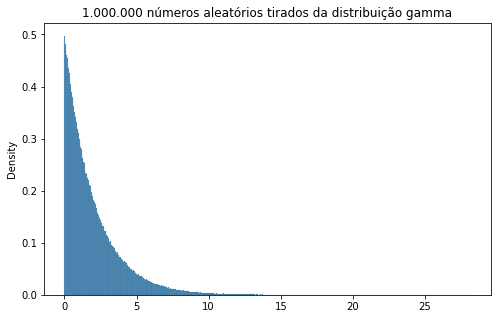


###############################################################

Média da distribuição populacional: 2.0
Desvio padrão da distribuição populacional: 2.0


In [5]:
plt.figure(figsize=(8, 5))
plt.title("Distribuição exponencial")

# x de 0 a 10
x = np.linspace(0, 25, 10000)

# y = f(x)
lbda = 0.5
y = lbda*np.exp(-lbda*x)

plt.plot(x, y)

plt.show()

###############################################################

plt.figure(figsize=(8, 5))
plt.title("1.000.000 números aleatórios tirados da distribuição gamma")

amostra=np.random.exponential(scale=1/lbda, size=1000000)

sns.histplot(x=amostra, stat="density")

plt.show()

###############################################################

print("\n###############################################################\n")

print("Média da distribuição populacional:", 1/lbda)
print("Desvio padrão da distribuição populacional:", 1/lbda)

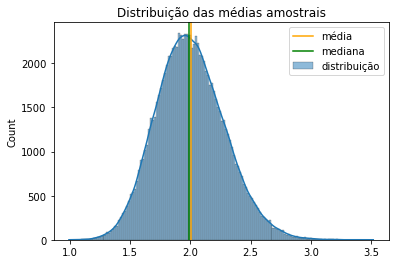


###############################################################

Média da distribuição de médias amostrais: 2.001007605826663 	 mediana: 1.9877272282934735
Erro padrão da distribuição de médias amostrais: 0.2834349003110675
SE*sqrt(n): 2.004187400348889

###############################################################

Média da distribuição populacional: 2.0
Desvio padrão da distribuição populacional: 2.0

###############################################################

Erro na estimativa da média: 0.0010076058266630383


In [7]:
#_________________________________________________________
# amostragem

num=100000
n=50
medias_amostrais = [(np.random.exponential(scale=1/lbda, size=n)).mean() for i in range(num)]

# medidas da distribuição amostral
media = np.array(medias_amostrais).mean()
std = np.array(medias_amostrais).std()
mediana = np.median(np.array(medias_amostrais))

#_________________________________________________________
# plot

plt.title("Distribuição das médias amostrais")

# distribuição
sns.histplot(medias_amostrais, kde=True, label="distribuição")

# reta da média
plt.axvline(media, label="média", color="orange")
# reta da mediana
plt.axvline(mediana, label="mediana", color="green")

plt.legend()
plt.show()

#_________________________________________________________
# infos

print("\n###############################################################\n")

print("Média da distribuição de médias amostrais:", media, "\t mediana:", mediana)
print("Erro padrão da distribuição de médias amostrais:", std)
print("SE*sqrt(n):", std*np.sqrt(n))

print("\n###############################################################\n")

print("Média da distribuição populacional:", 1/lbda)
print("Desvio padrão da distribuição populacional:", 1/lbda)

print("\n###############################################################\n")

print("Erro na estimativa da média:", abs(media - 1/lbda))

_____

### 1.1) Tá, mas e daí?

Vimos acima o TCL em ação, o que é bem legal.

Mas na prática, não é muito conveniente fazermos diversas amostras para termos uma distribuição amostral!

Na realidade, muitas vez temos recursos para fazer **apenas uma amostra**.

A boa notícia é que **se estivermos nas condições de aplicação do TCL**, isso é tudo que basta: **UMA AMOSTRA!**

Com uma única amostra, é possível calcularmos **nossos estimadores pontuais**, e, além disso (e mais importante): estimar uma **margem de erro** que nos dê, com certo grau de confiança, um intervalo de valores possíveis para o parâmetro populacional!

Vamos entender isso melhor...

_____

### 1.2) Intervalos de confiança

Quando calculamos um **estimador pontual** com base nos dados de uma amostra, esse valor do estimador é a **melhor (e única!) estimativa que temos para o parâmetro populacional**.

Mas, como este estimador foi calculado com base em um pedaço reduzido da população, é natural **haja uma diferença com relação ao parâmetro populacional**.

> Por isso, é importante que tenhamos um **intervalo de valores possíveis** para a estimativa do parâmetro populacioonal ao invés do estimador pontual (daí o nome "pontual", aliás)

Especificar apenas o parâmetro pontual é como **pescar com uma lança**: é uma técnica precisa, mas tem alta chance de errar.

Se queremos ter mais chances de caputrar o peixe, seria melhor **usar uma rede**: menos precisa, mas mais segura.

O equivalente de "pescar com uma rede" é especificar um **intervalo de confiança**, ou seja, um **intervalo de valores para o parâmetro populacional**, com certo grau de confiança, ao invés de apresentarmos um único valor.

Como o estimador pontual é nosso melhor palpite para o parâmetro populacional, faz sentido que ele seja o centro do intervalo de confiança. Mas como definir os limites do intervalo?

<img src="https://i1.wp.com/itfeature.com/wp-content/uploads/2019/07/ci11.png?resize=644%2C216" width=500>


Para definir a **largura do intervalo de confiança**, utilizamos **o erro padrão**!

> Sabemos que, **dentro das hipóteses do TCL**,
- A **média da distribuição amostral será o parâmetro de interesse** ($\mu_{\bar{x}} = \mu$, $\mu_{\hat{p}} = p$);
- O erro padrão representa o **desvio padrão** do estimador pontual;
- A distribuição amostral do estimador será **aproximadamente normal**

Sabendo tudo isso, e sabendo que 95% dos dados estão centrados entre 1.96 desvios-padrão da dsitribuição normal,

<img src="https://www.simplypsychology.org/NormalDist1.96.png?ezimgfmt=rs:380x256/rscb24/ng:webp/ngcb24" width=400>

> **Podemos construir um intervalo de confiança que se estende 1.96 erros padrões (SEs) do estimador pontual para estarmos 95% confiantes de que o intervalo captura o parâmetro populacional!**

Isso significa que se fizéssemos **muitas amostras**, aproximadamente 95% dos intervalos de confiança construídos **conteriam o parâmetro populacional!**

<img src="https://lh3.googleusercontent.com/y0l2Oz0E1AWPhKL_6-v5AnKJbf_63hOPlmvWWMTrHyXt9gXuZGP6VmnWU6HElc2MAmqevJwrMk8WrXI99LWI-3vAdYfoyMJ6iak-R3a7oyZOuNO4iBZiobOtjKGkKL6q9hXQdaAB" width=900>

**Níveis de confiança e significância**

O **nível de confiança** ($1 - \alpha$) representa a probabilidade de **acerto** da estimativa.

De forma complementar, o **nível de significância** ($\alpha$) expressa a probabilidade de **erro** da estimativa.

O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.

O **nível de confiança** de uma estimativa pode ser obtido a partir da área sob a curva normal como ilustrado na figura abaixo.

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img007.png)

No caso que discutimos acima, tomando $1-\alpha=95\%$, temos que:

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img008.png)

De fato,

In [10]:
from scipy.stats import norm

(norm.cdf(1.96) - norm.cdf(-1.96))*100

95.0004209703559

Podemos também nos fazermos a pergunta inversa: dado um nível de confiança $1-\alpha$, qual deve ser o valor de z?

In [12]:
conf = 0.95
sig = 1 - conf

conf, sig

(0.95, 0.050000000000000044)

In [13]:
conf + sig/2

0.975

In [14]:
conf = 0.95
sig = 1 - conf

# inversa da cdf: qual é o valor de z, que dá área igual ao argumento?
norm.ppf(conf + sig/2)

1.959963984540054

É comum usarmos a notação: $z_{\alpha/2}=1.96$.

Assim,

> **Se a distribuição amostral de um estimador pontual $EP$ se enquadra nas condições do TCL, o intervalo de confiança de 95% é dado por $$\boxed{EP \pm 1.96 \  SE_{EP}}$$**

Ou seja, para o caso da **média**, temos $\bar{x} \pm 1.96 \ \frac{\sigma}{\sqrt{n}}$

E para o caso das proporções, $\hat{p} \pm 1.96 \ \sqrt{\frac{p(1-p)}{n}}$

Para diferentes graus de confiança, usamos diferentes multiplicadores

<img src="https://s3-us-west-2.amazonaws.com/courses-images/wp-content/uploads/sites/1729/2017/04/15032441/m9_inference_two_proportion_topic_9_2_m9_est_diff_two_pop_prop_2_image3.png" width=400>

> **IC de 90%: $\boxed{EP \pm 1.645 \  SE_{EP}}$**

> **IC de 99%: $\boxed{EP \pm 2.576 \  SE_{EP}}$**

Naturalmente, quanto **mais largo o IC**, mais **confiança você tem que o parâmetro populacional é capturado dentro do intervalo**: quanto maior a rede, mais chance vc tem de pegar o peixe!

### Agora deu pra perceber a importância de uma amostra grande?

Note as equações para o SE da média e da proporção:


Não somente um $n$ grande nos perimite usar o TCL (**e isso é um elemento fundamental de tudo o que fizemos!!**), como os SE são **inversamente proporcionais** a $\sqrt{n}$, de modo que $$\uparrow n  \ \ \Leftrightarrow  \ \downarrow SE \ \ \ \Leftrightarrow \  \downarrow IC$$

E, claro, quão menor é o IC, mais precisa é nossa estimativa para o parâmetro populacional!

Vamos agora a alguns exemplos!

_____


**Exemplo 1**: Uma pesquisa feita com 1000 adultos aleatoriamente selecionados revelou que 848 deles eram a favor da expansão do uso de energia eólica no país.

In [18]:
# qual o interesse da pesquisa?

"Determinar qual é a proporção de pessoas do país favoráveis à expansão da energ. eólica"

'Determinar qual é a proporção de pessoas do país favoráveis à expansão da energ. eólica'

$p$ : proporção populacional

In [19]:
# qual é a proporção de pessoas, dentro desta amostra, que são a favor da 
# expansão do uso de energia eólica no pais?

n = 1000

p_hat = 848/n

p_hat

0.848

In [28]:
# você considera razoável modelar a propoção de cidadãos que são a favor da expansão do uso de
# energia eólica como uma distribuição normal?

print("check 1: sim, é amostra aleatória")

if n*p_hat >= 10 and n*(1-p_hat) >= 10:
    print("check 2: sim, amostra suficientemente grande!")
else:
    print("Não podemos usar o TCL")

check 1: sim, é amostra aleatória
check 2: sim, amostra suficientemente grande!


In [29]:
# n > 30

In [24]:
n*p_hat, n*(1-p_hat)

(848.0, 152.00000000000003)

In [23]:
n*p_hat >= 10

True

In [25]:
n*(1-p_hat) >= 10

True

$\hat{p} \pm 1.96 \ \sqrt{\frac{p(1-p)}{n}}$

In [36]:
def calc_z_a2(conf):
    
    sig = 1 - conf

    # inversa da cdf: qual é o valor de z, que dá área igual ao argumento?
    return norm.ppf(conf + sig/2)

In [52]:
# crie um IC de 95% para a proporção populacional de pessoas que são a favor da expansão do uso de
# energia eólica no país

def calc_ic_p(conf, p_hat, n):

    z_a2 = calc_z_a2(conf)

    ME = z_a2*np.sqrt((p_hat*(1-p_hat))/n)

    IC_min = p_hat - ME
    IC_max = p_hat + ME

    return IC_min, IC_max

In [53]:
IC_min, IC_max = calc_ic_p(0.95, 848/1000, 1000)

IC_min, IC_max

(0.8257480635415209, 0.8702519364584791)

In [43]:
print("A chance da proporção populacional ser {:.1f}% é {:.0f}%".format(p_hat*100, conf*100))

print("Estamos {:.0f}% confiantes de que a proporção populacional é de {:.1f}%".format(conf*100, p_hat*100))

A chance da proporção populacional ser 84.8% é 95%
Estamos 95% confiantes de que a proporção populacional é de 84.8%


In [44]:
# como interpretar este resultado?

print("Com {:.0f}% de confiança, podemos dizer que a proporção populacional está entre {:.1f}% e {:.1f}%".format(conf*100,
                                                                                                                 IC_min*100,
                                                                                                                 IC_max*100))

Com 95% de confiança, podemos dizer que a proporção populacional está entre 82.6% e 87.0%


Botando tudo acima na função:

In [61]:
conf = 0.95
n = 1000

IC_min, IC_max = calc_ic_p(conf, 848/n, n)

print("Com {:.0f}% de confiança, podemos dizer que a proporção populacional está entre {:.1f}% e {:.1f}%".format(conf*100,
                                                                                                                 IC_min*100,
                                                                                                                 IC_max*100))

Com 95% de confiança, podemos dizer que a proporção populacional está entre 82.6% e 87.0%


Mudando confiança pra 99%, mantendo mesmo `n`

In [56]:
conf = 0.99
n = 1000

IC_min, IC_max = calc_ic_p(conf, 848/n, n)

print("Com {:.0f}% de confiança, podemos dizer que a proporção populacional está entre {:.1f}% e {:.1f}%".format(conf*100,
                                                                                                                 IC_min*100,
                                                                                                                 IC_max*100))

Com 99% de confiança, podemos dizer que a proporção populacional está entre 81.9% e 87.7%


Mantendo confiança pra 95%, mas aumentando `n`

In [69]:
conf = 0.95
n = 10000

IC_min, IC_max = calc_ic_p(conf, 8469/n, n)

print("Com {:.0f}% de confiança, podemos dizer que a proporção populacional está entre {:.1f}% e {:.1f}%".format(conf*100,
                                                                                                                 IC_min*100,
                                                                                                                 IC_max*100))

Com 95% de confiança, podemos dizer que a proporção populacional está entre 84.0% e 85.4%


_____

**Exemplo 2**: Vamos pegar a base de pesos e alturas:

In [93]:
df_wh = pd.read_csv('../datasets/weight-height.csv')

df_wh["Height"] = df_wh["Height"] * 2.54
df_wh["Weight"] = df_wh["Weight"] / 2.2046

df_wh

,Gender,Height,Weight
0,Male,187.571423,109.722200
1,Male,174.706036,73.623547
2,Male,188.239668,96.498619
3,Male,182.196685,99.810610
4,Male,177.499761,93.599656
...,...,...,...
9995,Female,168.078536,62.041846
9996,Female,170.350573,77.505174
9997,Female,162.224700,58.276022
9998,Female,175.346978,74.322989


In [95]:
# qual é a média de alturas e pesos dentre os diferentes sexos?

df_wh.groupby("Gender").mean()

,Height,Weight
Gender,,
Female,161.820285,61.625734
Male,175.326919,84.831997


In [96]:
# é justo modelar as médias amostrais acima como normalmente distribuídas?

df_wh["Gender"].value_counts()

Female    5000
Male      5000
Name: Gender, dtype: int64

In [98]:
"Como n>30 para ambas as amostras, sim, estamos nas premissas do TCL"

'Como n>30 para ambas as amostras, sim, estamos nas premissas do TCL'

In [105]:
len(df_wh["Height"])

10000

In [106]:
df_wh["Height"].shape[0]

10000

In [110]:
# calcule o SE das amostras de altura e peso de cada sexo
def SE(x):
    
    return x.std()/np.sqrt(len(x))
#     return x.std()/np.sqrt(x.shape[0])


df_wh.groupby("Gender").agg([np.mean, SE])

Height               Weight          
              mean        SE       mean        SE
Gender                                           
Female  161.820285  0.096853  61.625734  0.122026
Male    175.326919  0.102855  84.831997  0.126893

$\bar{x} \pm z_{\alpha/2} \ \frac{\sigma}{\sqrt{n}}$

In [111]:
calc_z_a2(0.99)

2.5758293035489004

In [116]:
# calcule agora o intervalo de confiança de 99% para as médias populacionais de altura e peso entre os sexos

def IC_99(x):
    
    ic_min = x.mean() - calc_z_a2(0.99)*SE(x)
    ic_max = x.mean() + calc_z_a2(0.99)*SE(x)
    
    return round(ic_min, 2), round(ic_max, 2)


df_wh.groupby("Gender").agg([np.mean, SE, IC_99])

Height                                 Weight            \
              mean        SE             IC_99       mean        SE   
Gender                                                                
Female  161.820285  0.096853  (161.57, 162.07)  61.625734  0.122026   
Male    175.326919  0.102855  (175.06, 175.59)  84.831997  0.126893   

                        
                 IC_99  
Gender                  
Female  (61.31, 61.94)  
Male    (84.51, 85.16)

In [119]:
# como interpretar este resultado?

print("Estamos 99% confiantes de que a média de altura para mulheres está entre 161.57cm e 162.07cm")
print("Estamos 99% confiantes de que a média de peso para mulheres está entre 61.31kg e 61.94kg")

Estamos 99% confiantes de que a média de altura para mulheres está entre 161.57cm e 162.07cm
Estamos 99% confiantes de que a média de peso para mulheres está entre 61.31kg e 61.94kg


__________

### 1.3) Cálculo do tamanho amostral

#### 1.3.1) População Infinita

Uma população é considerada infinita quando seu tamanho é muito grande.

Ao realizar o cálculo do tamanho da amostra $n$, deve-se levar em consideração o erro $\epsilon$ máximo que deseja-se assumir (ao estimar a função parâmetrica) e o nível de confiança do resultado (probabilidade). Sendo assim, o problema consiste em determinar $n$ de forma que:

$$P(\mid \overline{X} - \mu \mid \leq \epsilon) \simeq 1 - \alpha $$

Mas pelo Teorema Central do Limite, a equação acima pode ser reescrita como:

$$P \left(\mid \overline{X} - \mu \mid \leq z_{\alpha/2}\frac{\sigma}{\sqrt{n}} \right) \simeq 1 - \alpha $$

Sendo assim, dados um erro máximo e nível de confiança, calcular o tamanho amostral consiste em:

$$ z_{\alpha/2}\frac{\sigma}{\sqrt{n}} = \epsilon  \Longrightarrow n = \left(\frac{z_{\alpha/2}\sigma}{\epsilon }\right) ^2 $$

#### 1.3.2) População Finita

No caso em que o tamanho populacional não é tão grande, a consideramos finita. **Caso a amostra tenha um tamanho $n$ maior ou igual a 5% do tamanho da população $N$, considera-se que a população é finita**. Neste caso, aplica-se um fator de correção à fórmula vista anteriormente:

$$n = \frac{N (z_{\alpha/2}\sigma)^2}{(N-1)\epsilon^2 + (z_{\alpha/2}\sigma)^2 }$$

#### 1.3.3) Principais níveis de confiança usados

<table>
    <th style="text-align: center; border: 1px solid black">Grau de Confiança</th>
    <th style="text-align: center; border: 1px solid black">$\alpha$</th>
    <th style="text-align: center; border: 1px solid black">$z_{\alpha/2}$</th>
    <tr style=" border: 1px solid black">
        <td style="text-align: center; border: 1px solid black">90%</td>
        <td style="text-align: center; border: 1px solid black">0,10</td>
        <td style="text-align: center; border: 1px solid black">1,645</td>
    </tr>
    <tr style="text-align: center; border: 1px solid black">
        <td style="text-align: center; border: 1px solid black">95%</td>
        <td style="text-align: center; border: 1px solid black">0,05</td>
        <td style="text-align: center; border: 1px solid black">1,96</td>
    </tr>
    <tr style="text-align: center; border: 1px solid black">
        <td style="text-align: center; border: 1px solid black">99%</td>
        <td style="text-align: center; border: 1px solid black">0,01</td>
        <td style="text-align: center; border: 1px solid black">2,575</td>
    </tr>
</table>


#### 1.3.4) Variância populacional desconhecida

No caso em que a variância populacional é desconhecida, pode-se realizar uma amostragem aleatória preliminar (ao menos 30 elementos) para estimar a variancia amostral e usa-la na equação acima.

$$\widehat{\sigma^2} = s^2 = \frac{\sum_{i=1}^{n}(x_i -\overline{X})^2}{N-1} $$

### Exemplo 1

Estamos estudando o rendimento mensal dos chefes de domicílios no Brasil. Nosso supervisor determinou que o **erro máximo em relação a média seja de R$\$$ 100,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R$\$$ 3.323,39**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo?

In [70]:
desvio_populacional = 3323.39

In [71]:
erro = 100

In [73]:
# dado o nível de confiança de 95%...

z = 1.96

# # # ou, então:
# z = norm.ppf(0.95 + (0.05/2))

In [74]:
n = ((z * desvio_populacional) / erro) ** 2

n

4243.016886741135

In [75]:
np.ceil(n)

4244.0

In [76]:
np.floor(n)

4243.0

### Exemplo 2

Em um lote de **10.000 latas** de refrigerante foi realizada uma amostra aleatória simples de **500 latas** e foi obtido o **desvio padrão amostral do conteúdo das latas igual a 12 ml**. O fabricante estipula um **erro máximo sobre a média populacional de apenas 5 ml**. Para garantir um **nível de confiança de 95%** qual o tamanho de amostra deve ser selecionado para este estudo?

In [85]:
desvio = 12
erro = 5
N = 10000
z = 1.96

$$n = \frac{N (z_{\alpha/2}\sigma)^2}{(N-1)\epsilon^2 + (z_{\alpha/2}\sigma)^2 }$$

In [86]:
num = N * (z * desvio)**2

den = ((N - 1) * erro**2) + (z * desvio)**2

n = num / den

n

22.08096418677521

In [87]:
np.ceil(n)

23.0

___
___
___